# Understanding the data and its structure is crucial for effective data analysis.
### Let's explore the dataset to understand its structure and contents.
#### Dataset details:
- 0: sadness
- 1: joy
- 2: love
- 3: anger
- 4: fear
- 5: surprise

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datasets import load_dataset
from wordcloud import WordCloud

In [10]:
dataset = load_dataset("emotion", cache_dir="./cache")

In [11]:
train_df = pd.DataFrame(dataset["train"])
print(train_df.head(10))

                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3
5  ive been feeling a little burdened lately wasn...      0
6  ive been taking or milligrams or times recomme...      5
7  i feel as confused about life as a teenager or...      4
8  i have been with petronas for years i feel tha...      1
9                                i feel romantic too      2


In [22]:
# Mapping labels to emotions
label_mapping = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise"
}

/tmp/ipykernel_7279/1711782581.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_df, palette='viridis')


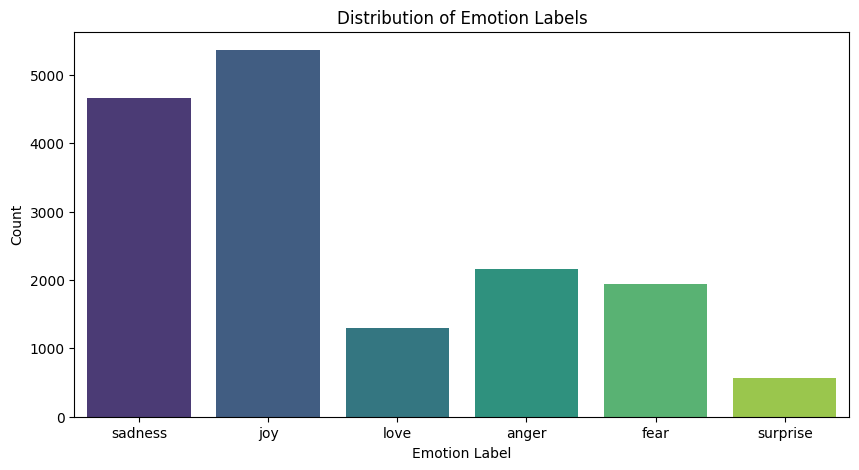

In [30]:
# countplot of the labels
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=train_df, palette='viridis')
plt.title('Distribution of Emotion Labels')
plt.xlabel('Emotion Label')
plt.ylabel('Count')
plt.xticks(ticks=np.arange(6), labels=[label_mapping[i] for i in range(6)])
plt.savefig("plots/emotion_label_distribution.png")
plt.show()

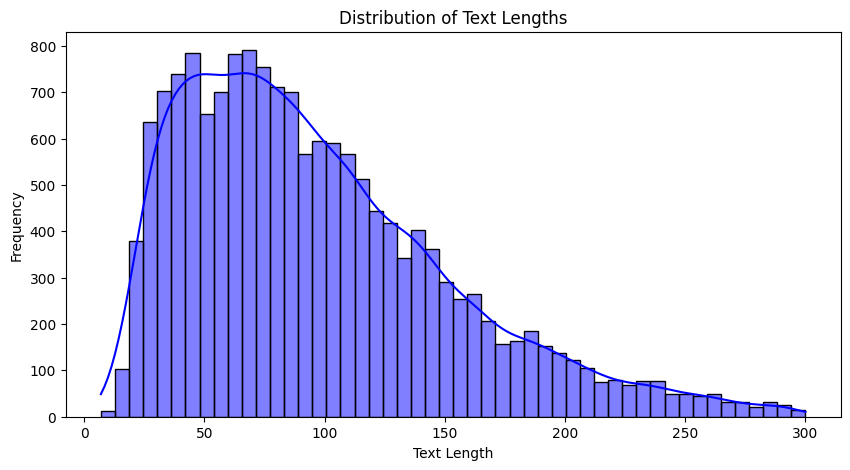

In [31]:
# Text length distribution
plt.figure(figsize=(10, 5))
sns.histplot(train_df['text'].str.len(), bins=50, kde=True, color='blue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.savefig("plots/emotion_text_length_distribution.png")
plt.show()

/tmp/ipykernel_7279/3752190980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=train_df['text'].str.len(), data=train_df, palette='viridis')


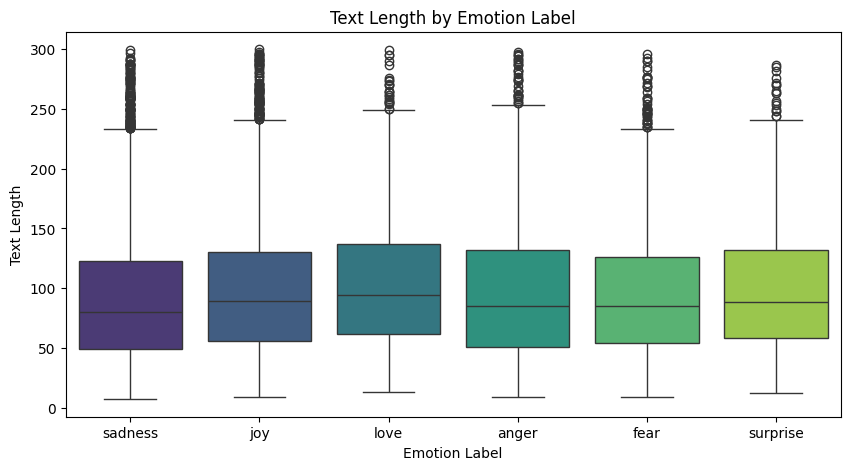

In [32]:
# Emotion vs Text Length
plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y=train_df['text'].str.len(), data=train_df, palette='viridis')
plt.title('Text Length by Emotion Label')
plt.xlabel('Emotion Label')
plt.ylabel('Text Length')
plt.xticks(ticks=np.arange(6), labels=[label_mapping[i] for i in range(6)])
plt.savefig("plots/emotion_text_length_by_label.png")
plt.show()

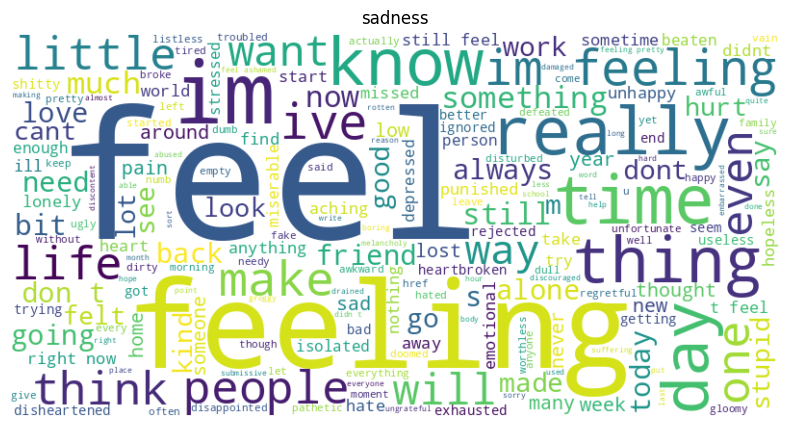

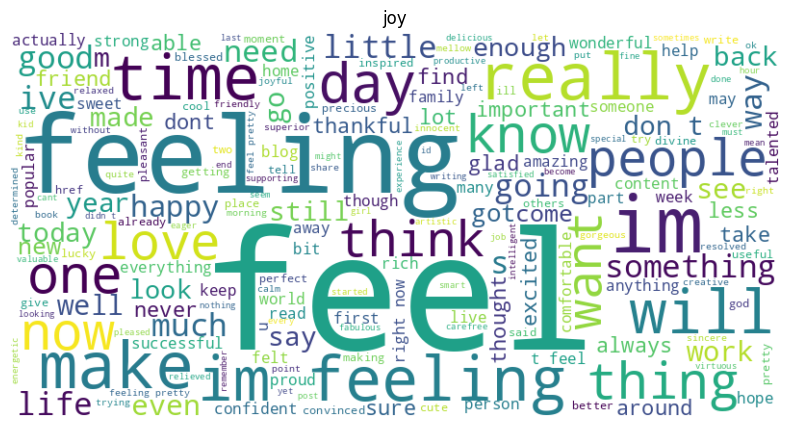

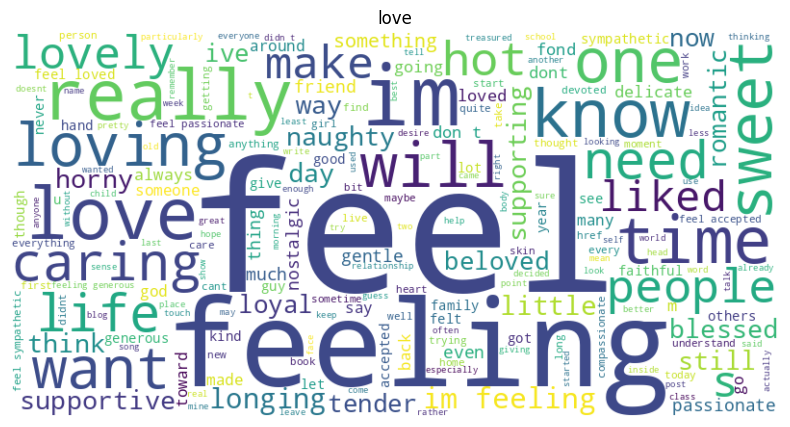

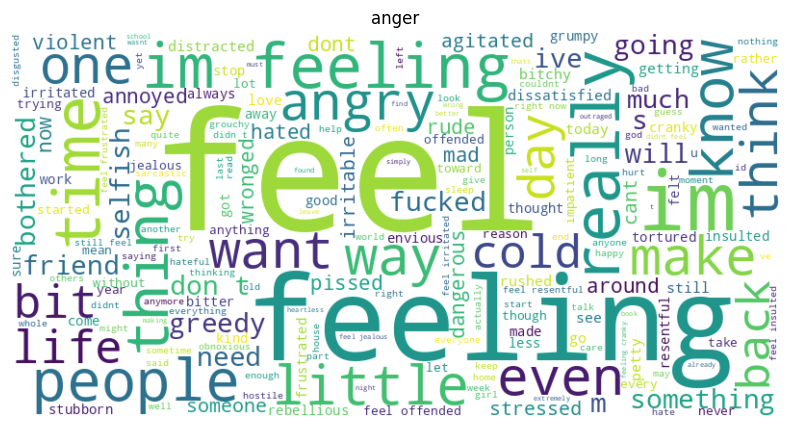

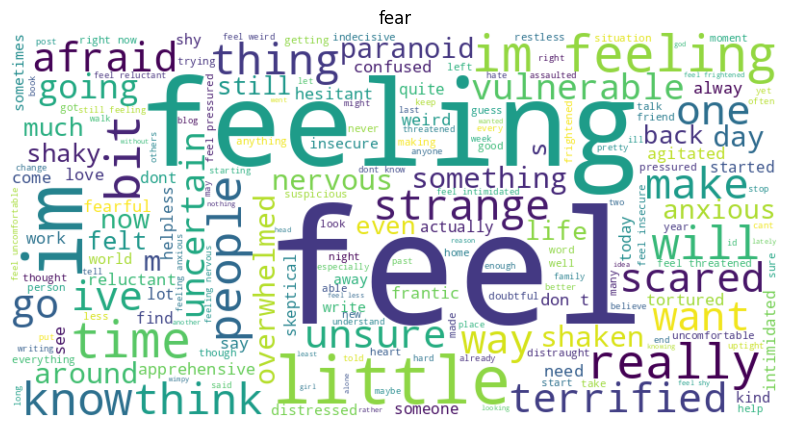

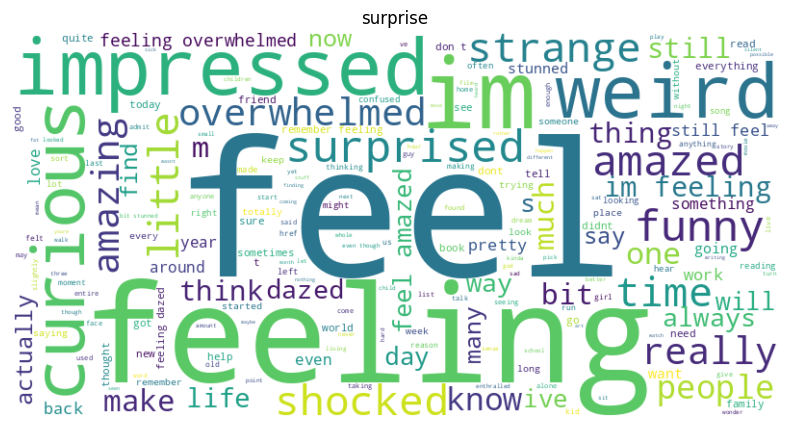

In [34]:
# Word Cloud for each emotion

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.savefig(f"plots/wordcloud_{title.lower()}.png")
    plt.show()

for label, emotion in label_mapping.items():
    text = ' '.join(train_df[train_df['label'] == label]['text'])
    generate_wordcloud(text, emotion)